In [ ]:
# Fall 2024 - MH
# Environment: fmri_stats
# Plot behavioral quiz scores for each study, group & timepoint for subpanels of Figure 1

In [19]:
# SET-UP
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import copy

base_dir = '/dartfs-hpc/rc/lab/K/KraemerD/ASL1-2_combined/'
quiz_dir=base_dir+'data/behavioral/'

# Study 1

##### Study 1 had two groups (ASL and RUSS) who each completed three timepoints
##### On Day 1, quiz on 12 signs they just learned
##### On Day 2, quiz on additional 12 signs they just learned (these are pooled as a single "post-lesson" score)
##### On Day 3, review quiz on all 24 signs.
##### In-scanner self-reported recall is also included in this file but will not be analyzed

In [21]:
quiz_df=pd.read_csv(quiz_dir+'ASL1_summary_quiz_scores_all.csv')

grp1 = quiz_df[quiz_df['group'] ==1]
grp2 = quiz_df[quiz_df['group'] ==2]

scores12 = [[(x/24)*100 for x in list(grp1['day12'])], [(x/24)*100 for x in list(grp2['day12'])]]
scores3 = [(x/24)*100 for x in list(grp1['day3'])], [(x/24)*100 for x in list(grp2['day3'])]

## Subpanel A1: ASL group scores on Days 1-2 (pooled) and 3

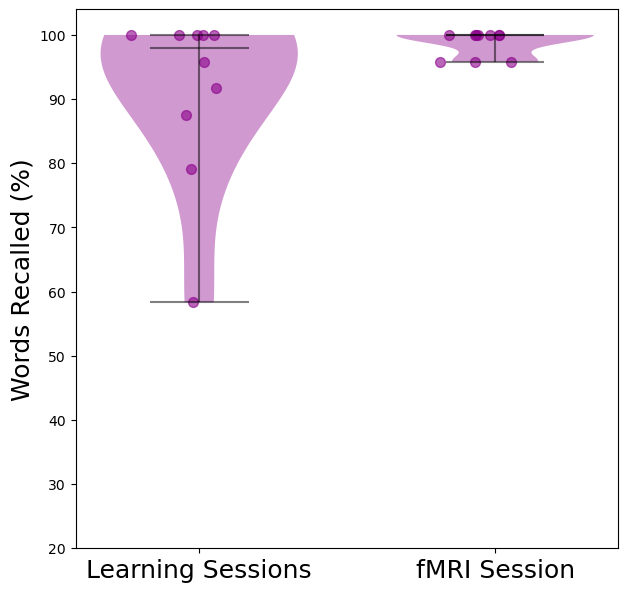

In [23]:
# Plot ASL Group alone, no Russ group
t1 = [scores12[0],scores3[0]]

# Creating a figure and axis using subplots()
fig, ax = plt.subplots(figsize= (7, 7))

# Plotting three pairs of violin plots
v1 = ax.violinplot(t1, positions=[1, 1.6],widths=0.4,bw_method="silverman", 
                        showmeans=False, showmedians=True, showextrema=True)

# make jittered X and Y lists for the scatter plots for each group separately
jitter = 0.04
x_data_a = [[1]*10,[1.6]*10]
x_jittered_a = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data_a]
y_data_a = [scores12[0],scores3[0]]


for x,y in zip(x_jittered_a,y_data_a):
    ax.scatter(x,y,s=50,color='darkmagenta',alpha=.6)

# Customize violin colors
for V in [v1]:
    g1 = V["bodies"][0]
    g1.set_facecolor('darkmagenta')
    g1.set_linewidth(1.4)
    g1.set_alpha(0.4)

    g2 = V["bodies"][1]
    g2.set_facecolor('darkmagenta')
    g2.set_linewidth(1.4)
    g2.set_alpha(0.4)

    for line in ('cmins','cmedians','cmaxes','cbars'):
        V[line].set_color(['black'])
        V[line].set_alpha(.5)

# Adding labels and title
ax.set_xticks([1, 1.6])
ax.set_ylim(20,104)
ax.set_xticklabels(['Learning Sessions', 'fMRI Session'],fontsize=18)
ax.set_ylabel('Words Recalled (%)',fontsize=18)

# Display the plot
plt.show()
out_fn = base_dir+'figures/asl1_quizscores_by_group_asl_group_only'
fig.savefig(out_fn+'.png',dpi=300,bbox_inches = "tight")

#  Study 2
##### Study 2 had two groups who each studied different ASL signs completed three timepoints
##### At T1, post-lesson quiz on 32 signs
##### At T2, pre-scan recall+old/new test of 32 signs they studied and 32 they did not
##### At T3, repeat recall+old/new test 1 week after scan

In [11]:
quiz_df=pd.read_csv(quiz_dir+'ASL2_summary_quiz_scores_all.csv')

#create subject dictionary
subj_dict = {'001':{'group':'1'},'003':{'group':'2'},'004':{'group':'1'},
     '005':{'group':'1'},'006':{'group':'1'},'007':{'group':'1'},'008':{'group':'1'},
     '009':{'group':'1'},'010':{'group':'1'},'011':{'group':'1'},'012':{'group':'1'},
     '013':{'group':'2'},'014':{'group':'1'},'015':{'group':'2'},'016':{'group':'2'},
     '017':{'group':'2'},'018':{'group':'2'},'019':{'group':'2'},'020':{'group':'2'},
     '021':{'group':'2'},'022':{'group':'2'},'023':{'group':'2'},'024':{'group':'2'},
     '025':{'group':'2'},'026':{'group':'2'},'027':{'group':'2'},'028':{'group':'1'},
     '029':{'group':'2'},'030':{'group':'2'},'031':{'group':'1'},'032':{'group':'2'},
     '033':{'group':'1'},'034':{'group':'1'},'035':{'group':'1'},'036':{'group':'1'},
     '037':{'group':'1'},'038':{'group':'1'},'040':{'group':'1'},'041':{'group':'2'},
     '042':{'group':'2'}}

groups=[]
for s in subj_dict.keys():
    groups.append(subj_dict[s]['group'])

# make subj lists by group
subs1 = []
subs2 = []
for SUB in subj_dict:
    if subj_dict[SUB]['group'] == '1': subs1.append(int(SUB))
    elif subj_dict[SUB]['group'] == '2': subs2.append(int(SUB))

t1_a =[]
t1_b =[]
t2_a =[]
t2_b =[]
t3_a =[]
t3_b =[]

# make subj lists by group (a=group1, b=group2)

for row in quiz_df.index:
    if int(quiz_df.iloc[row]['subID']) in subs1:
        t1_a.append(quiz_df.iloc[row]['T1'])
        t2_a.append(quiz_df.iloc[row]['T2'])
        t3_a.append(quiz_df.iloc[row]['T3'])
        
    elif int(quiz_df.iloc[row]['subID']) in subs2:
        t1_b.append(quiz_df.iloc[row]['T1'])
        t2_b.append(quiz_df.iloc[row]['T2'])
        t3_b.append(quiz_df.iloc[row]['T3'])


### Test between groups at each timepoint, confirm no group difference

In [16]:
print(st.ttest_ind(t1_a,t1_b))
print(st.ttest_ind(t2_a,t2_b))
print(st.ttest_ind(t3_a,t3_b))

TtestResult(statistic=-0.7266077577477487, pvalue=0.4719187501829407, df=38.0)
TtestResult(statistic=-0.24116569281758976, pvalue=0.8107232685143057, df=38.0)
TtestResult(statistic=-0.25204723011666846, pvalue=0.8023628320042818, df=38.0)


## Subpanel B1: Plot both groups' T1 & T2 scores

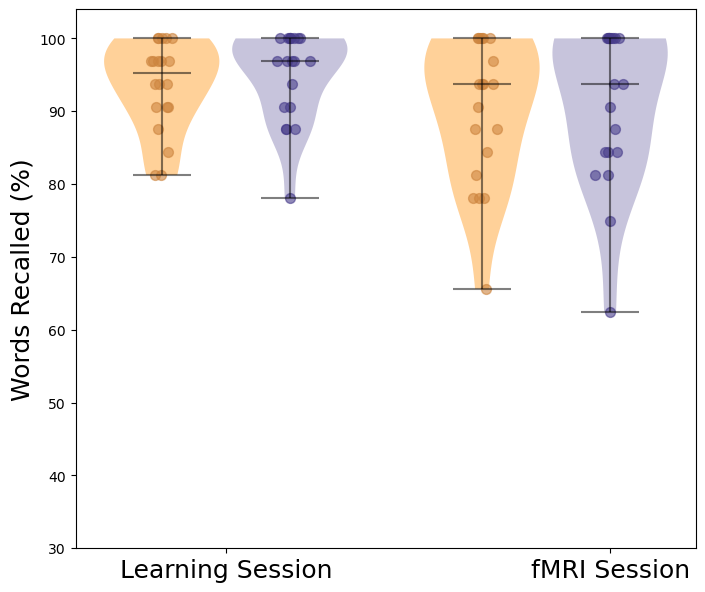

In [15]:
t1 = [t1_a, t1_b]
t2 = [t2_a, t2_b]


# Creating a figure and axis using subplots()
fig, ax = plt.subplots(figsize= (8, 7))

# Plotting three pairs of violin plots
v1 = ax.violinplot(t1, positions=[1, 2],widths=0.9,bw_method="silverman", 
                        showmeans=False, showmedians=True, showextrema=True)
v2 = ax.violinplot(t2, positions=[3.5, 4.5],widths=0.9,bw_method="silverman", 
                        showmeans=False, showmedians=True, showextrema=True)

# make jittered X and Y lists for the scatter plots for each group separately
jitter = 0.04
x_data_a = [[1]*20,[3.5]*20]
x_jittered_a = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data_a]
y_data_a = [t1_a,t2_a]

x_data_b = [[2]*20,[4.5]*20]
x_jittered_b = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data_b]
y_data_b = [t1_b,t2_b]

for x,y in zip(x_jittered_a,y_data_a):
    ax.scatter(x,y,s=50,color='peru',alpha=.6)

for x,y in zip(x_jittered_b,y_data_b):
    ax.scatter(x,y,s=50,color='darkslateblue',alpha=0.6)
    
# Customize violin colors
for V in [v1, v2]:
    g1 = V["bodies"][0]
    g1.set_facecolor('darkorange')
    g1.set_linewidth(1.4)
    g1.set_alpha(0.4)
        
    g2 = V["bodies"][1]
    g2.set_facecolor('darkslateblue')
    g2.set_linewidth(1.4)
    g2.set_alpha(0.3)   
    
    for line in ('cmins','cmedians','cmaxes','cbars'):
        V[line].set_color(['black'])
        V[line].set_alpha(.5)

# Adding labels and title
ax.set_xticks([1.5, 4.5])
ax.set_ylim(30,104)
ax.set_xticklabels(['Learning Session', 'fMRI Session'],fontsize=18)
ax.set_ylabel('Words Recalled (%)',fontsize=18)

# Display the plot
plt.show()
out_fn = base_dir+'figures/asl2_quizscores_by_group_t1-2_only'
fig.savefig(out_fn+'.png',dpi=300,bbox_inches = "tight")

## Subpanel B2: T3 Follow-Up quiz score

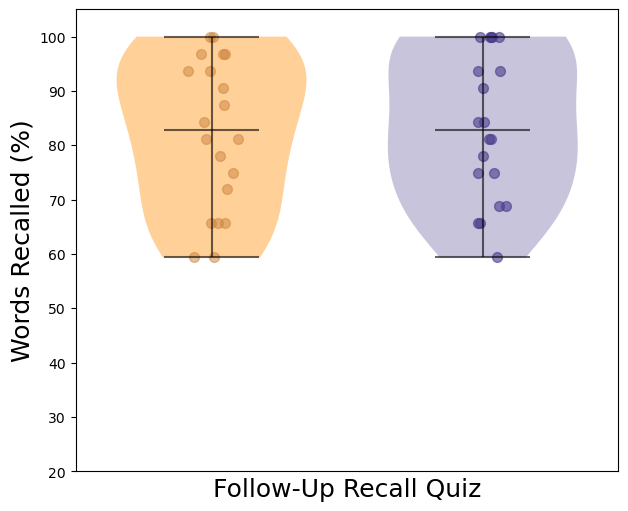

In [18]:
scores = [t3_a,t3_b]

# Creating a figure and axis using subplots()
fig, ax = plt.subplots(figsize= (7, 6))

# Plotting three pairs of violin plots
v1 = ax.violinplot(scores, positions=[1,2],widths=0.7,bw_method="silverman", 
                        showmeans=False, showmedians=True, showextrema=True)


# make jittered X and Y lists for the scatter plots for each group separately
jitter = 0.04
x_data_a = [[1]*len(scores[0])]
x_jittered_a = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data_a]
y_data_a = [scores[0]]

for x,y in zip(x_jittered_a,y_data_a):
    ax.scatter(x,y,s=50,color='peru',alpha=.5)


x_data_b = [[2]*len(scores[1])]
x_jittered_b = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data_b]
y_data_b = [scores[1]]

for x,y in zip(x_jittered_b,y_data_b):
    ax.scatter(x,y,s=50,color='darkslateblue',alpha=0.6)
    
# Customize violin colors
for V in [v1]:
    g1 = V["bodies"][0]
    g1.set_facecolor('darkorange')
    g1.set_linewidth(1.4)
    g1.set_alpha(0.4)

    for line in ('cmins','cmedians','cmaxes','cbars'):
        V[line].set_color(['black'])
        V[line].set_alpha(0.6)

    g2 = V["bodies"][1]
    g2.set_facecolor('darkslateblue')
    g2.set_linewidth(1.4)
    g2.set_alpha(0.3)   



# Adding labels and title
# ax.set_xticks([1.5, 4.5, 7.5])
ax.set_ylim(20,105)
ax.set_xlim(0.5,2.5)
ax.set_xticks([])
ax.set_xlabel("Follow-Up Recall Quiz", fontsize=18)
#ax.set_xticks
ax.set_ylabel('Words Recalled (%)',fontsize=18)
#ax.set_title('Follow-Up Quiz',fontsize=18)

# Display the plot
plt.show()
out_fn = base_dir+'figures/asl2_quizscores_by_group_t3alone'
fig.savefig(out_fn+'.png',dpi=300,bbox_inches = "tight")